In [10]:
import sys
import os

# Get the absolute path to the 'src' directory
module_path = os.path.abspath(
    os.path.join("..", "src")
)  # Go up one level, then into 'src'

# Add it to sys.path if it's not already there
if module_path not in sys.path:
    sys.path.insert(0, module_path)  # Insert at the beginning is often better


# Now reimport the specific functions
from CL.Data import SequentialMNIST
from CL.Eval import evaluate_full_dataset, evaluate_task_accuracies
from CL.Train import (
    train_models,
    train_model,
)
from models.mlpnet import MlpNetBase
from CL.Utils import load_models, copy_model, set_all_seeds
from CL.Merge import (
    naive_merge,
    ot_merge,
    curve_merge,
    seq_merge,
    seq_merge_curve,
    seq_merge_finetune,
    mag_max,
    seq_merge_ft,
)


import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [3]:
naive_accuracies = []
ot_accuracies = []
curve_accuracies = []
seq_accuracies = []


for i in range(5):
    print("Seed: ", i)
    set_all_seeds(i)
    # Load the dataset
    model = MlpNetBase(input_dim=784)
    path = "../checkpoints/cl_checkpoints/seed_" + str(i)

    seq_data = SequentialMNIST()

    joint_train_loader, joint_test_loader = seq_data.get_joint_data()

    train_models(seq_data, model, path)

    loaded_models = load_models(path, 5, model, input_dim=784, num_classes=10)

    # naive merging
    print("Naive merging")
    naive_model = seq_merge(naive_merge, loaded_models, 784, 10)

    naive_accuracies.append(evaluate_task_accuracies(naive_model, seq_data))

    # ot merging
    print("OT merging")
    ot_model = seq_merge(ot_merge, loaded_models, 784, 10, joint_test_loader)

    ot_accuracies.append(evaluate_task_accuracies(ot_model, seq_data))

    # curve merging
    print("Curve merging")
    curve_model = seq_merge_curve(curve_merge, loaded_models, 784, 10, seq_data)

    curve_accuracies.append(evaluate_task_accuracies(curve_model, seq_data))
    # seq merging

Seed:  0


/home/lars/Documents/Uni/ETH/S1/DL/dl2024/CL/Utils.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(


Naive merging
+++++++++++++++++++++++++++++++++++++++++++++
merging model 1 with ratio 0.5
+++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++++
merging model 2 with ratio 0.6666666666666666
+++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++++
merging model 3 with ratio 0.75
+++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++++
merging model 4 with ratio 0.8
+++++++++++++++++++++++++++++++++++++++++++++
2115
Total: 2115, Correct: 736
2042
Total: 2042, Correct: 100
1874
Total: 1874, Correct: 375
1986
Total: 1986, Correct: 1027
1983
Total: 1983, Correct: 988
Total accuracy: 32.26
OT merging
+++++++++++++++++++++++++++++++++++++++++++++
merging model 1 with ratio 0.5
+++++++++++++++++++++++++++++++++++++++++++++
-1
Previous layer shape is  None
Processing the coordinates to form ground_metric
In weight mode: normalizing weights to unit norm
stats of vecs are: mean 0.547752916

/home/lars/Documents/Uni/ETH/S1/DL/dl2024/model.py:120: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/home/lars/miniconda3/envs/MolPhys/lib/python3.12/site-packages/torch/nn/_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


size of test_loader dataset:  10000

Test set: Avg. loss: 2.3026, Accuracy: 679/10000 (7%)

param_list: [tensor([[ 0.0010,  0.0178, -0.0242,  ...,  0.0202,  0.0044,  0.0030],
        [-0.0153, -0.0111, -0.0072,  ..., -0.0157, -0.0033, -0.0241],
        [-0.0220,  0.0083, -0.0334,  ..., -0.0222, -0.0036,  0.0023],
        ...,
        [-0.0015,  0.0071, -0.0056,  ...,  0.0187, -0.0266, -0.0003],
        [ 0.0088,  0.0162,  0.0214,  ...,  0.0135, -0.0109,  0.0221],
        [ 0.0005, -0.0190,  0.0056,  ...,  0.0258,  0.0203, -0.0149]]), tensor([[-0.0195,  0.0185, -0.0291,  ...,  0.0258, -0.0385,  0.0017],
        [-0.0037, -0.0001,  0.0163,  ..., -0.0106,  0.0392,  0.0310],
        [ 0.0250,  0.0362, -0.0036,  ..., -0.0095, -0.0288, -0.0053],
        ...,
        [ 0.0366,  0.0300, -0.0096,  ..., -0.0252, -0.0383, -0.0332],
        [-0.0419,  0.0117,  0.0098,  ...,  0.0127, -0.0448, -0.0061],
        [-0.0423,  0.0397,  0.0441,  ..., -0.0089,  0.0267, -0.0006]]), tensor([[ 0.0382, -0.0438

In [12]:
print("Naive: ", naive_accuracies)
print("OT: ", ot_accuracies)
print("Curve: ", curve_accuracies)

naive_tot = []
ot_tot = []
curve_tot = []

for i in range(5):
    naive_tot.append(naive_accuracies[i][1])
    ot_tot.append(ot_accuracies[i][1])
    curve_tot.append(curve_accuracies[i][1])

Naive:  [([34.79905437352246, 4.897159647404505, 20.010672358591247, 51.71198388721047, 49.82349974785678], 32.26), ([20.56737588652482, 24.632713026444662, 37.83351120597652, 61.581067472306145, 24.71003530005043], 33.6), ([54.515366430260045, 22.38001958863859, 13.92742796157951, 47.12990936555891, 33.78719112455875], 34.77), ([54.94089834515366, 11.900097943192948, 35.2187833511206, 49.34541792547835, 37.72062531517902], 37.93), ([53.853427895981085, 20.176297747306563, 33.351120597652084, 39.828801611278955, 15.582450832072617], 32.760000000000005)]
OT:  [([71.53664302600473, 50.68560235063663, 11.84631803628602, 51.3595166163142, 22.138174483106404], 42.29), ([78.67612293144208, 24.926542605288933, 31.963713980789755, 0.0, 0.0], 27.72), ([10.638297872340425, 62.536728697355535, 13.553895410885806, 46.928499496475325, 0.20171457387796268], 26.919999999999998), ([27.990543735224588, 8.961802154750245, 43.81003201707578, 48.6404833836858, 48.26021180030257], 35.19), ([51.205673758865

In [13]:
naive_mean = np.mean(naive_tot, axis=0)
ot_mean = np.mean(ot_tot, axis=0)
curve_mean = np.mean(curve_tot, axis=0)

naive_std = np.std(naive_tot, axis=0)
ot_std = np.std(ot_tot, axis=0)
curve_std = np.std(curve_tot, axis=0)

print("Naive mean: ", naive_mean)
print("OT mean: ", ot_mean)
print("Curve mean: ", curve_mean)

print("Naive std: ", naive_std)
print("OT std: ", ot_std)
print("Curve std: ", curve_std)

Naive mean:  34.263999999999996
OT mean:  35.43
Curve mean:  92.21199999999999
Naive std:  2.020619706921616
OT std:  7.363985334042974
Curve std:  0.23911503507725976


In [ ]:
joint_accuracies = []
for i in range(5):
    # train model on entire dataset
    seq_data = SequentialMNIST()
    model = MlpNetBase(input_dim=784)
    train_model(model, joint_train_loader, joint_test_loader)
    _, acc = evaluate_task_accuracies(model, seq_data, joint_test_loader)
    print("Accuracy: ", acc)
    joint_accuracies.append(acc)

In [ ]:
joint_mean = np.mean(joint_accuracies)
joint_std = np.std(joint_accuracies)

print("Joint mean: ", joint_mean)
print("Joint std: ", joint_std)

Joint mean:  98.53599999999999
Joint std:  0.050039984012790785


In [17]:
joint_mean = np.mean(joint_accuracies)
joint_std = np.std(joint_accuracies)

print("Joint mean: ", joint_mean)
print("Joint std: ", joint_std)

In [ ]:
# try curver merge with different replay buffer sizes
model = MlpNetBase(784)
seq_data = SequentialMNIST()
joint_train, joint_test = seq_data.get_joint_data()
sizes = [16, 32, 64, 128, 256, 512]
seq_accuracies = []
naive_accuracies = []

for seed in range(5):
    set_all_seeds(seed)

    seq_seed_accuracies = []
    naive_seed_accuracies = []
    path = "../checkpoints/cl_checkpoints/seed_" + str(i)

    for size in sizes:
        print(f"Size: {size}")
        seq_data.current_task = 0

        loaded_models = load_models(path, 5, model, input_dim=784, num_classes=10)
        seq_curve_model = seq_merge_curve(
            curve_merge, loaded_models, 784, 10, seq_data, replay_size=size
        )

        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        _, acc = evaluate_task_accuracies(seq_curve_model, seq_data)

        seq_seed_accuracies.append(acc)

        loaded_models = load_models(path, 5, model, input_dim=784, num_classes=10)
        naive_model = seq_merge_ft(
            naive_merge, loaded_models, 784, 10, seq_data, replay_size=size
        )

        _, acc = evaluate_task_accuracies(naive_model, seq_data)

        naive_seed_accuracies.append(acc)



    seq_accuracies.append(seq_seed_accuracies)
    naive_accuracies.append(naive_seed_accuracies)

[11.222 11.458 32.986 80.958 89.056 92.368]
[23.718 24.008 26.566 29.396 35.178 40.714]
[64.108 80.04  85.338 88.788 91.522 93.674]


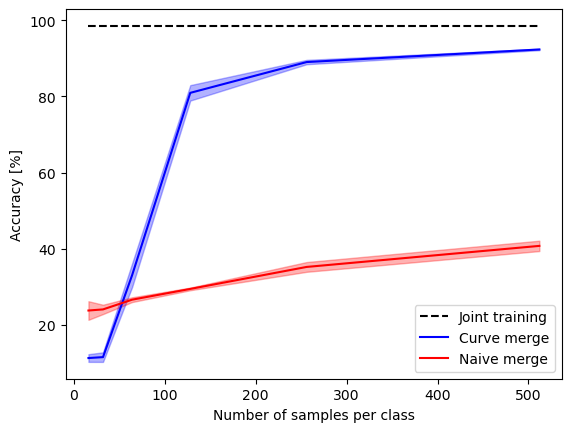

In [12]:
# compute mean and std of the accuracies
seq_accuracies = np.array(seq_accuracies)
mean_accuracies = np.mean(seq_accuracies, axis=0)
std_accuracies = np.std(seq_accuracies, axis=0)
print(mean_accuracies)

naive_accuracies = np.array(naive_accuracies)
mean_naive_accuracies = np.mean(naive_accuracies, axis=0)
std_naive_accuracies = np.std(naive_accuracies, axis=0)
print(mean_naive_accuracies)



# plot the accuracies as function of the size of the replay buffer
import matplotlib.pyplot as plt
# add line for joint training
joint_mean = 98.56
plt.plot(sizes, [joint_mean]*len(sizes), color="black", label="Joint training", linestyle="--")
plt.plot(sizes, mean_accuracies, color="blue", label="Curve merge")


plt.fill_between(sizes, mean_accuracies-std_accuracies, mean_accuracies+std_accuracies, alpha=0.3, color="blue")
plt.plot(sizes, mean_naive_accuracies, color="red", label="Naive merge")
plt.fill_between(sizes, mean_naive_accuracies-std_naive_accuracies, mean_naive_accuracies+std_naive_accuracies, alpha=0.3, color="red")

plt.legend()


plt.xlabel("Number of samples per class")
plt.ylabel("Accuracy [%]")
plt.savefig("curve_merge_replay_size.png")
plt.show()